In [ ]:
import re
import nltk
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_tweets.csv')

In [ ]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [ ]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [ ]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

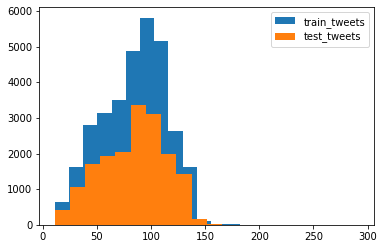

In [ ]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.hist(length_train, bins=20, label='train_tweets')
plt.hist(length_test, bins=20, label='test_tweets')
plt.legend()
plt.show()

In [ ]:
combi = train.append(test, ignore_index = True)
combi.shape

(49159, 3)

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [ ]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [ ]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-z#]", " ")

In [ ]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [ ]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

In [ ]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [ ]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())

In [ ]:
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet

In [ ]:
all_words = ' '.join([text for text in combi['tidy_tweet']]) 

In [ ]:
from wordcloud import WordCloud

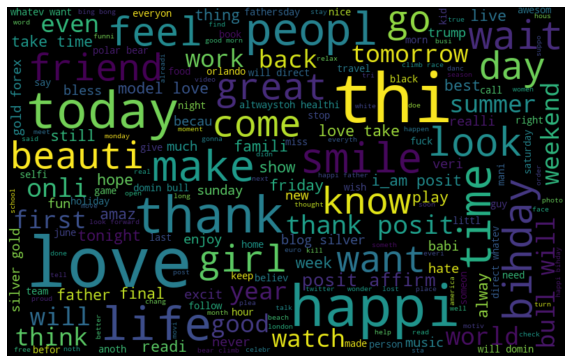

In [ ]:
wordcloud = WordCloud(width = 800, height=500, random_state = 21, max_font_size=100).generate(all_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

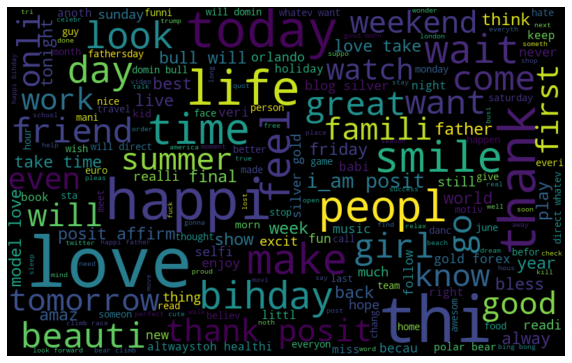

In [ ]:
normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])
wordcloud = WordCloud(width = 800, height=500, random_state = 21, max_font_size=100).generate(normal_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

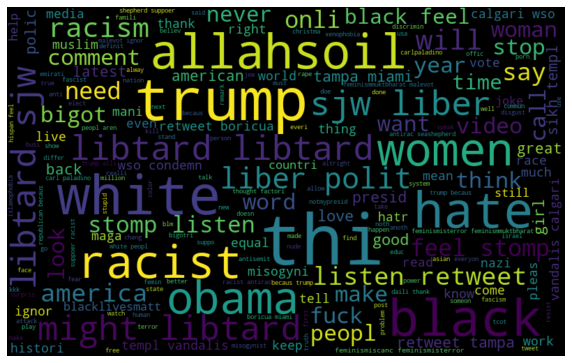

In [ ]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width = 800, height=500, random_state = 21, max_font_size=100).generate(negative_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
def hashtag_extract(x):
  hashtags = []
  for i in x:
    ht = re.findall(r"#(\w+)", i) 
    hashtags.append(ht)
  return hashtags

In [ ]:
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

In [ ]:
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

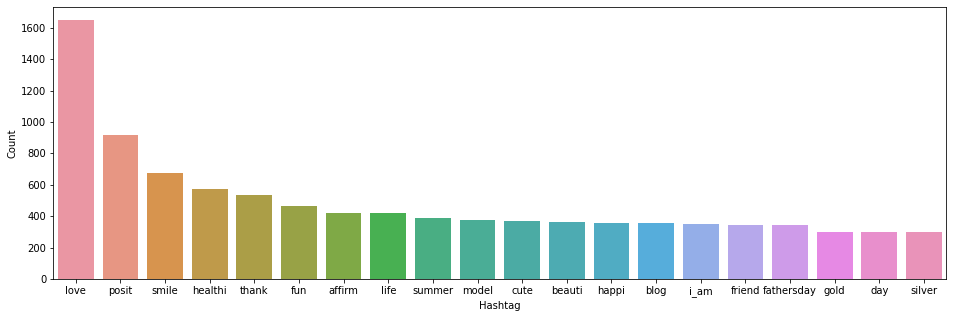

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
d = d.nlargest(columns="Count", n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel = 'Count')
plt.show()

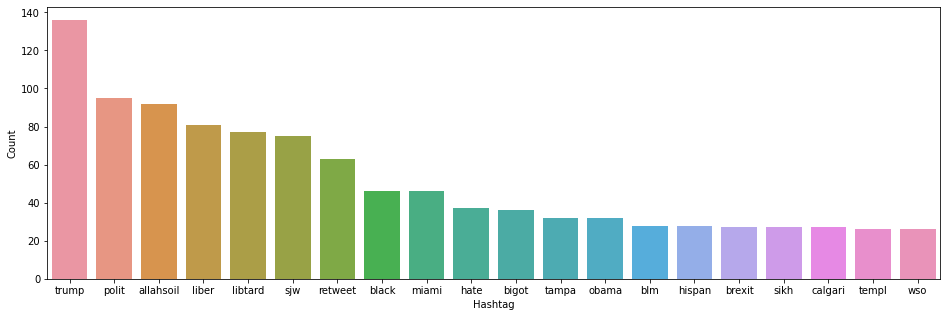

In [ ]:
b = nltk.FreqDist(HT_negative) 
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count':list(b.values())})
e = e.nlargest(columns="Count", n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x="Hashtag", y="Count")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [ ]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
models_w2v = gensim.models.Word2Vec(
             tokenized_tweet,
             size = 200, 
             window = 5, 
             min_count = 2,
             sg = 1,
             hs = 0,
             negative = 10,
             workers = 2,
             seed = 34

)

In [ ]:
models_w2v.train(tokenized_tweet, total_examples = len(combi['tidy_tweet']), epochs = 20)

(6513903, 7542080)

In [ ]:
models_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.5642338991165161),
 ('cookout', 0.5618970394134521),
 ('#cellar', 0.5477083921432495),
 ('#avocado', 0.540706992149353),
 ('alfredo', 0.5381700992584229),
 ('aladdin', 0.5365502834320068),
 ('#biall', 0.533116340637207),
 ('#pasta', 0.5330433249473572),
 ('#burrito', 0.5317268371582031),
 ('burrito', 0.5314245223999023)]

In [ ]:
models_w2v.wv.most_similar(positive="trump")

[('donald', 0.5547602772712708),
 ('hillari', 0.5338189601898193),
 ('jibe', 0.5312768220901489),
 ('nomine', 0.5259912610054016),
 ('unstabl', 0.5250024795532227),
 ('#delegaterevolt', 0.5207850933074951),
 ('phoni', 0.5202600955963135),
 ('potu', 0.5193363428115845),
 ('businessman', 0.5174202919006348),
 ('melo', 0.5171740651130676)]

In [ ]:
models_w2v['food']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-7.1354389e-02,  4.1209680e-01, -1.2209958e-01, -3.8503104e-01,
        5.6429452e-01,  2.1374772e-01,  4.4095367e-01,  4.6689200e-01,
       -1.8728054e-01, -2.4530718e-01,  9.9369571e-02,  2.5956288e-01,
       -4.5441762e-01,  2.9945111e-01, -4.7472066e-01, -1.8568254e-01,
       -1.8486254e-01,  9.3124932e-01, -2.4490656e-01, -2.9461533e-01,
       -5.1389045e-01,  3.3429295e-01, -2.8686062e-01,  3.0179009e-01,
        4.7879753e-01,  1.7821620e-01,  4.0926558e-01, -4.4323154e-02,
       -6.0916424e-01, -4.4043773e-01, -1.0327314e+00,  2.4977517e-01,
        3.0195868e-01,  2.3423309e-02,  4.6173483e-01, -3.9542645e-02,
        6.2887794e-01,  2.9058272e-01,  1.5531427e-01, -5.1317406e-01,
       -4.9906865e-01,  5.3509456e-01,  1.9090872e-01, -2.6244810e-02,
        1.3820375e+00, -2.5490403e-01, -1.3965784e-01, -2.6070067e-01,
       -1.0651032e-01, -5.6852263e-01, -8.9356595e-01, -3.9451122e-01,
       -6.3962406e-01, -1.7460993e-01, -1.2518229e-01, -4.8700792e-01,
      

In [ ]:
len(models_w2v['food'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


200

In [ ]:
def word_vector(tokens, size):
  vec = np.zeros(size).reshape((1,size))
  count = 0
  for word in tokens:
    try:
      vec += model_w2v[word].reshape((1,size))
      count += 1
    except:
      continue
  if count != 0:
    vec /= count
  return vec

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
  wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
  wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)

In [ ]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
def add_label(twt):
  output = []
  for i, s in zip(twt.index, twt):
    output.append(LabeledSentence(s, ["tweet_" + str(i)]))
  return output

In [ ]:
labeled_tweets = add_label(tokenized_tweet)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


In [ ]:
labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [ ]:
model_d2v = gensim.models.Doc2Vec(dm=1, dm_mean = 1, size=200, window = 5, negative=7, min_count=5, workers=3, alpha=0.1, seed=23)

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [ ]:
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples = len(combi['tidy_tweet']), epochs=15)

100%|██████████| 49159/49159 [00:00<00:00, 1340256.82it/s]


In [ ]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(combi)):
  docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(49159, 200)

In [ ]:
!pip install sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:, :]
xtrain_bow, xvalid_bow, y_train, y_valid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)
lreg = LogisticRegression()
lreg.fit(xtrain_bow, y_train)
prediction = lreg.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(y_valid, prediction_int)

0.5283333333333333

In [ ]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int 
file_write = test[['id', 'label']]
file_write.to_csv('Logistic_bagofwords.csv', index = False)

In [ ]:
train_tfidf = tfidf[:31962, :]
test_tfidf = tfidf[31962:, :]
xtrain_tfidf = train_tfidf[y_train.index]
xvalid_tfidf = train_tfidf[y_valid.index]
lreg.fit(xtrain_tfidf, y_train)
prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(y_valid, prediction_int)


0.5446507515473032

In [ ]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:, :]
xtrain_w2v = train_w2v.iloc[y_train.index, :]
xvalid_w2v = train_w2v.iloc[y_valid.index, :]
# lreg.fit(xtrain_w2v,y_train)
# prediction = lreg.predict_proba(xvalid_w2v)
# prediction_int = prediction[:,1] >= 0.3
# prediction_int = prediction_int.astype(np.int)
# f1_score(y_valid, prediction_int)

In [ ]:
train_d2v = docvec_df.iloc[:31962,:]
test_d2v = docvec_df.iloc[31962:, :]
xtrain_d2v = train_d2v.iloc[y_train.index,:]
xvalid_d2v = train_d2v.iloc[y_valid.index,:]
lreg.fit(xtrain_d2v, y_train)
prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(y_valid, prediction_int)

0.37088388214904683

In [ ]:
from sklearn import svm

In [ ]:
svc = svm.SVC(kernel = 'linear', C=1, probability=True).fit(xtrain_bow, y_train)
prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(y_valid, prediction_int)


0.5065420560747664

In [ ]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id', 'label']]
submission.to_csv('svm_bow.csv', index=False)

**SVM has slighter less frequency than logistic Regression**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf = RandomForestClassifier(n_estimators = 400, random_state=11).fit(xtrain_bow, y_train)
prediction = rf.predict(xvalid_bow)
f1_score(y_valid, prediction)

0.5493630573248408

In [ ]:
test_pred = rf.predict(test_bow)
test['label'] = test_pred
file_write = test[['id', 'label']] 
file_write.to_csv('rf_bow.csv', index=False)

In [ ]:
rf = RandomForestClassifier(n_estimators=500, random_state=11).fit(xtrain_tfidf, y_train)
prediction = rf.predict(xvalid_tfidf)
f1_score(y_valid, prediction)

0.5619223659889094

In [ ]:
rf = RandomForestClassifier(n_estimators=400,random_state=11).fit(xtrain_d2v, y_train)
prediction = rf.predict(xvalid_d2v)
f1_score(y_valid, prediction)

0.0485021398002853

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, y_train)
prediction = xgb_model.predict(xvalid_bow)
f1_score(y_valid, prediction)

0.5130183220829316

In [ ]:
test_pred = xgb_model.predict(test_bow)
test['label'] = test_pred
file_write = test[['id', 'label']]
file_write.to_csv('sgb_bow.csv', index=False)

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, y_train)
prediction = xgb.predict(xvalid_tfidf)
f1_score(y_valid, prediction)

0.5148895292987512

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread=3).fit(xtrain_d2v, y_train)
prediction = xgb.predict(xvalid_d2v)
f1_score(y_valid, prediction)

0.33936651583710403

In [ ]:
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(xtrain_w2v, label=y_train)
dvalid = xgb.DMatrix(xvalid_w2v, label=y_valid)
dtest = xgb.DMatrix(test_w2v)

params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight':1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree' : 1
}

def custom_eval(preds, dtrain):
  labels = dtrain.get_label().astype(np.int)
  preds = (preds >= 0.3).astype(np.int)
  return [('f1_score', f1_score(labels, preds))]

In [ ]:
gridsearch_params = [
  (max_depth, min_child_weight)
  for max_depth in range(6,10)
    for min_child_weight in range(5,8)
]
print(gridsearch_params)
max_f1 = 0
best_params = None
for max_depth, min_child_weight in gridsearch_params:
  print("CV with max_depth={}, min_child_weight={}".format(
      max_depth, min_child_weight
  ))
  params['max_depth'] = max_depth
  params['min_child_weight'] = min_child_weight

  cv_results = xgb.cv(params, 
                      dtrain, 
                      feval=custom_eval, 
                      num_boost_round=200, 
                      maximize=True, 
                      seed=16, 
                      nfold=5, 
                    )
  mean_f1 = cv_results['test-f1_score-mean'].max()
  boost_rounds = cv_results['test-f1_score-mean'].argmax()
  print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
if mean_f1 > max_f1:
  max_f1 = mean_f1
  best_params = (max_depth, min_child_weight)
print("Best Params:", best_params[0], best_params[1], max_f1)

[(6, 5), (6, 6), (6, 7), (7, 5), (7, 6), (7, 7), (8, 5), (8, 6), (8, 7), (9, 5), (9, 6), (9, 7)]
CV with max_depth=6, min_child_weight=5
	F1 Score 0.1302024 for 0 rounds
CV with max_depth=6, min_child_weight=6
	F1 Score 0.1302024 for 0 rounds
CV with max_depth=6, min_child_weight=7
	F1 Score 0.1302024 for 0 rounds
CV with max_depth=7, min_child_weight=5
	F1 Score 0.1302024 for 0 rounds
CV with max_depth=7, min_child_weight=6
	F1 Score 0.1302024 for 0 rounds
CV with max_depth=7, min_child_weight=7
	F1 Score 0.1302024 for 0 rounds
CV with max_depth=8, min_child_weight=5
	F1 Score 0.1302024 for 0 rounds
CV with max_depth=8, min_child_weight=6
	F1 Score 0.1302024 for 0 rounds
CV with max_depth=8, min_child_weight=7
	F1 Score 0.1302024 for 0 rounds
CV with max_depth=9, min_child_weight=5
	F1 Score 0.1302024 for 0 rounds
CV with max_depth=9, min_child_weight=6
	F1 Score 0.1302024 for 0 rounds
CV with max_depth=9, min_child_weight=7
	F1 Score 0.1302024 for 0 rounds
Best Params: 9 7 0.1302024


In [ ]:
params['max_depth'] = 8
params['min_child_weight'] = 6

In [ ]:
girdsearch_params = [
    (subsample, colsample)
    for subsample in [i/10 for i in range(5,10)]
    for colsample in [i/10 for i in range(5,10)]
]

In [ ]:
max_f1 = 0
best_params = None
for subsample, colsample in gridsearch_params:
  print("CV with subsample = {}, colsample={}".format(subsample,colsample))
  params['colsample'] = colsample
  params['subsample'] = subsample
  cv_results = xgb.cv(
      params,
      dtrain,
      feval = custom_eval,
      num_boost_round = 200,
      maximize = True,
      seed = 16,
      nfold = 5,
      # early_stopping_rounds = 10
  )
  mean_f1 = cv_results['test-f1_score-mean'].max()
  boost_rounds = cv_results['test-f1_score-mean'].argmax()
  print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
  if mean_f1 > max_f1:
    max_f1 = mean_f1
    best_params = (subsample, colsample)
print("Best params: {}, {}, F1 Score: {}".format(best_params[0],best_params[1], max_f1))

CV with subsample = 6, colsample=5


XGBoostError: ignored